In [23]:
import numpy
import pandas as pd
from sklearn.datasets import load_diabetes

# Loading diabetes dataset
diabetes = load_diabetes()

# Conversion to dataframes
my_df = pd.DataFrame(diabetes.data,columns=diabetes.feature_names)

# Adding the target to the dataframe
my_df['target'] = diabetes.target
my_df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


In [24]:
# Spliting data into X and y
X = my_df.drop('target',axis=1)
y = my_df['target']
X.shape, y.shape

((442, 10), (442,))

In [25]:
# Spliting data into testing and training data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=50)

In [26]:
# Creating the linear regression object
from sklearn import linear_model
reg = linear_model.LinearRegression()

In [27]:
# Fitting the data into the model
reg.fit(X_train,y_train)

LinearRegression()

In [28]:
# Predicting the testing set
y_pred = reg.predict(X_test)

In [29]:
# Evaluating the performance of the model
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_percentage_error
r2 = r2_score(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
mape = mean_absolute_percentage_error(y_test,y_pred)

print("R2 Score : ", r2)
print("Mean squared error : ", mse)
print("Mean absolute percentage error : ", mape)

R2 Score :  0.523404931810618
Mean squared error :  2650.9596755812086
Mean absolute percentage error :  0.35003732701577633


Text(0, 0.5, 'Predicted Values')

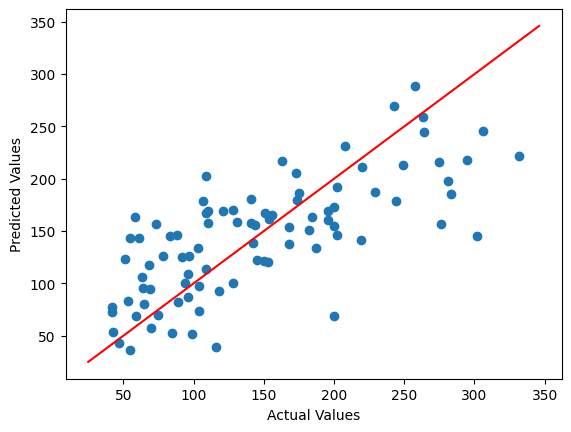

In [30]:
# Plot the predicted vs actual values
# Predicted values are on the x-axis
# Actual values are on the y-axis
# If the model is good enough, the points should condense near the straight line
import matplotlib.pyplot as plt

plt.scatter(y_test,y_pred)
plt.plot([y.min(),y.max()],[y.min(),y.max()],color="red")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")